# **Capstone project: Providing data-driven suggestions for HR**


## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


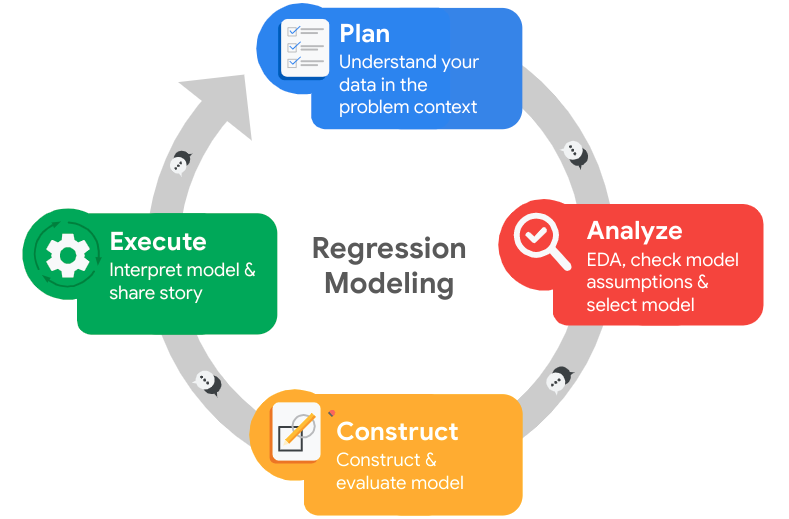

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** The dataset source was downloaded from [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Reflecting for Plan Stage**
1. The main stakeholders are Salifort’s senior leadership team and the Human Resources department.
2. Analyze the survey data taken by employees and come up with ideas for how to increase employee retention. 
3. Employees from the Sales department were the most that took the survey out of 10 departments in the company.
4. Used Excel Pivot Table for a first glance of the data, and then used the dataset in Visual Studio Code for all EDA, Construct, and Execute phase.
5. Given this dataset was provided by Coursera and created for a fictional company, it can be assumed it reliability and originality.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [5]:
# Import packages
#Data manipulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

#Data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Package for saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  [As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab.] Change [] sentence, to describing where the csv file lives.

In [6]:
# Load dataset into a dataframe

df0 = pd.read_csv("C:/Users/mvvb8/Documents/Coursera/Advancedanalytics/Capstone/Sailfort motors activity_filled/home/jovyan/work/HR_capstone_dataset.csv") #At the final review, change path to project folder for publication



# Display first few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [7]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [8]:
# Gather descriptive statistics about the data

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [9]:
# Display all column names
#Check for columns name mispelled or with uppercase letters
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
# Rename columns as needed
df0= df0.rename(columns ={'Work_accident': 'work_accident',
                         'average_montly_hours':'average_monthly_hours',
                         'time_spend_company': 'tenure',
                         'Department': 'department'})

# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [11]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [12]:
# Check for duplicates
df0.duplicated().sum()


np.int64(3008)

Found 3,008 duplicates of 14,999 total rows. This is 20% of the dataset. 

In [13]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The output above shows five instances of duplicated rows. Possible reasons of duplicates could be the survey was completed twice by the same employee. 
In another scenario, a likelihood analysis by applying the Bayes' theorem could be performed and multiply the probabilities of finding each value in each column. <br> Given that this data is fictional, the rows will be removed without further analysis.

In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')


#Descriptive statistics of df1 dataset
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Check outliers

Check for outliers in the data.

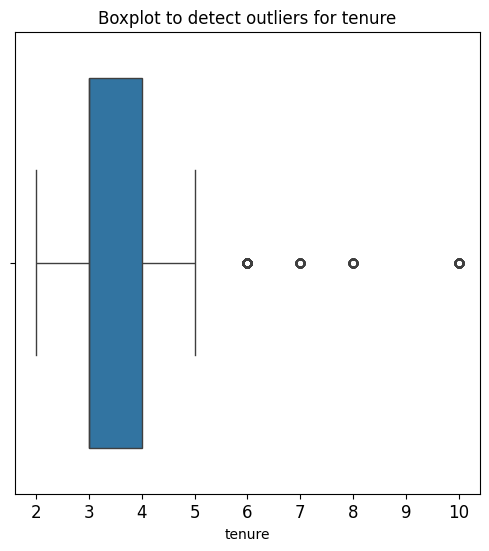

In [15]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize= 12)
plt.xticks(fontsize= 12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()


Evaluate how many rows in the data contain outliers for tenure column. Computing the percentiles and interquartile range. 

In [17]:
# Determine the number of rows containing outliers

#Compute 25th percentile value in 'tenure'
percentile25=df1['tenure'].quantile(0.25)

#Compute 75th percentile value in 'tenure'
percentile75=df1['tenure'].quantile(0.75)

#Compute the interquartile range in 'tenure'
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

#Identify subset of data containing outliers in 'tenure'
outliers = df1[(df1['tenure']> upper_limit) | (df1['tenure'] < lower_limit)]

#Count how many rows in the data contain outliers for 'tenure'
print("Number of rows in the data containing outliers in 'tenure':", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in 'tenure': 824


Tenure column has 824 rows as outliers. <br>
Certain types of models are more sensitive to outliers than others. During thestage of building your model, removing outliers will be considered, based on the type of model.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Reflecting for the Analysis Stage.**
1. The satisfactory level ranges from 0.09 to 1.0.
2. The tenure ranges from 2 to 10 years, with a median of 3 years.
3. Some columns had mix of upperclass letters which were all converted to lowercase. The column orginally called 'time_spend_company' was changed to 'tenure' for simple and concise name.
4. EDA process: <br>
    a. Get more understanding of employees staying vs leaving the company. <br>
    b. Create data visualizations to evaluate relationships between independent and dependent variables

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [18]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


Results indicate that 16% of employees left while 83% of employees stayed at the company.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

##### Examine the categorical columns counts of 'department' and 'sales'

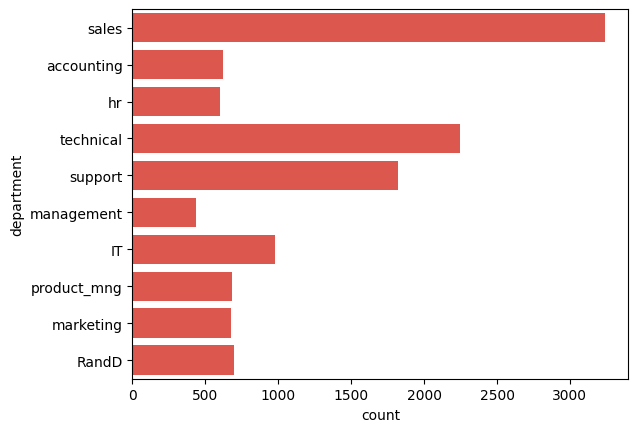

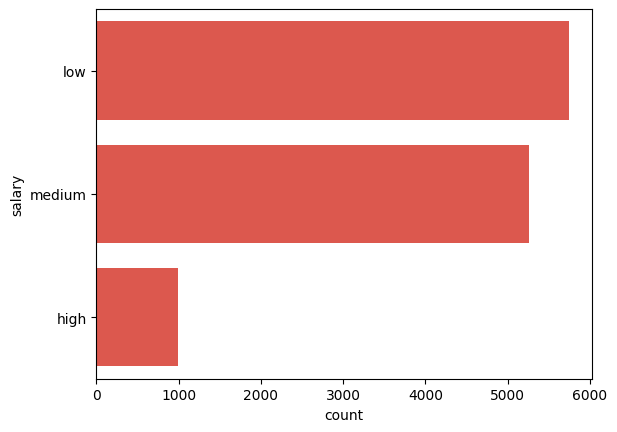

In [19]:
for column in df1.select_dtypes(include= 'object'):
    sns.countplot(y =column, data=df1, color ="#F44336")
    plt.show()


Create a boxplot to visualize distributions within data, including plot a stacked histogram to visualize the distribution of number_project for those who stayed and those who left.

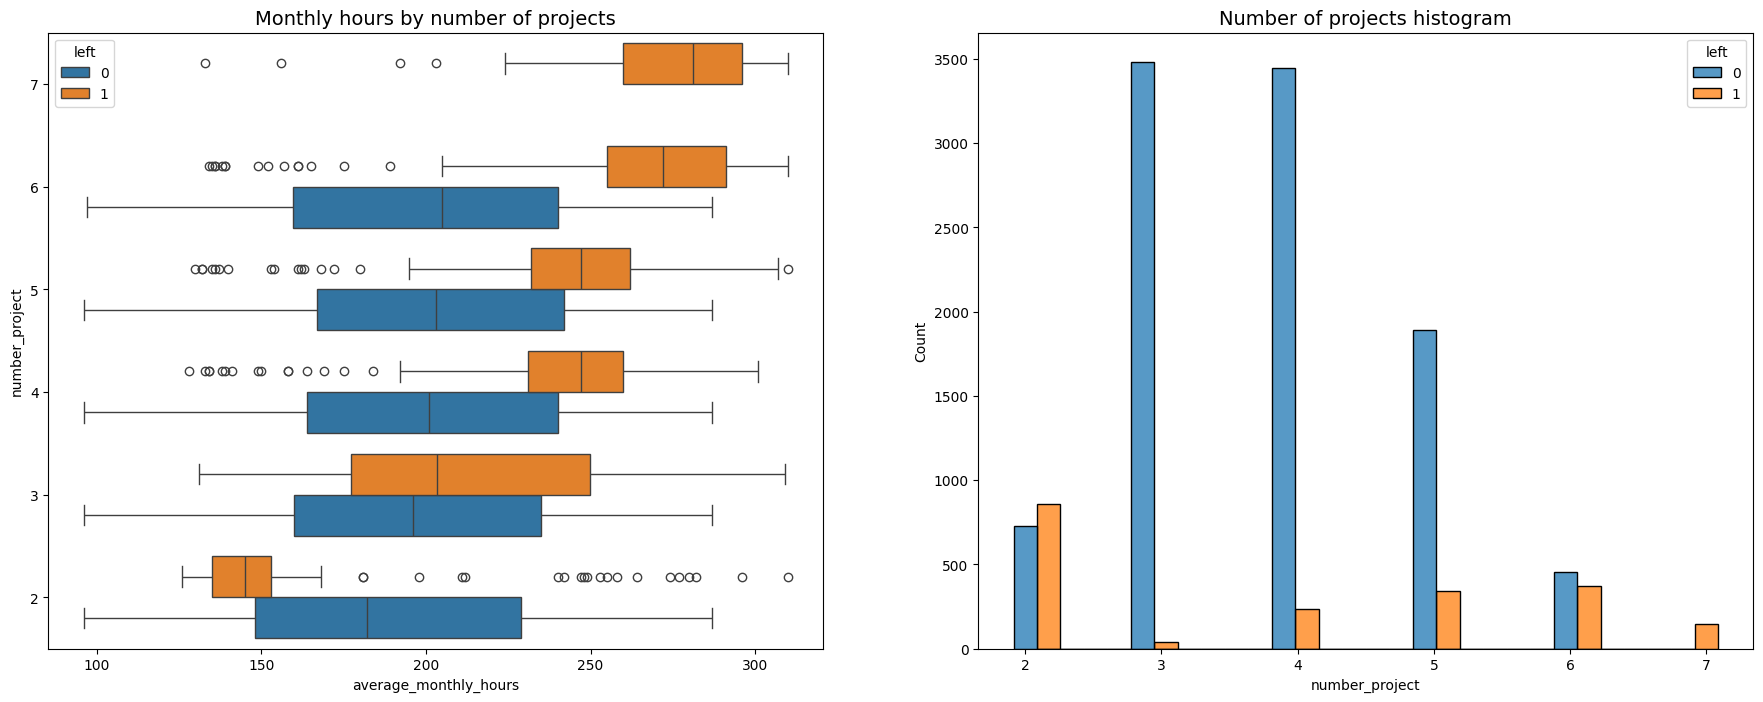

In [20]:
#Set figues and axes
fig,ax = plt.subplots(1,2, figsize= (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

### Insights

Seems that people who work on more projects would also work longer hours. 
There are two groups of employees who left the company: <br>
   (A) those who worked considerably less than their peers with the same number of projects, and <br>
   (B) those who worked much more. <br>
Of those in group A, it is possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. <br>
For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/month—much more than any other group.

The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts. <br>

If a work week is assumed to be of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working **[Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month]**. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.

Examine the average monthly hours versus the satisfaction levels comparing employees that stayed vs left.

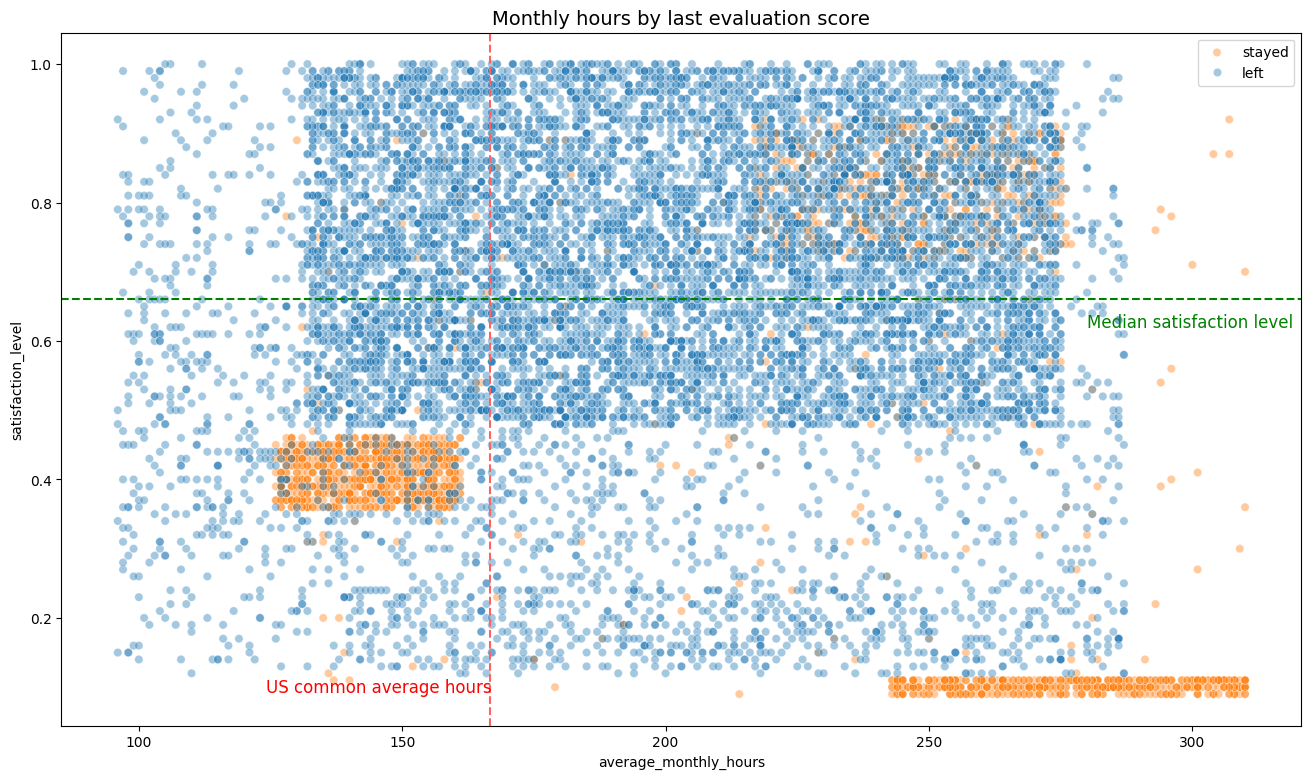

In [28]:
# Create a scatterplot for average monthly hours vs satisfaction levels

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)

#Add vertical and horizontal lines
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.axhline(y= 0.66, color= 'green', ls='--')

#Add legend 
plt.legend(labels=[ 'stayed','left'])

#Add text labels
plt.text(167,0.1, 'US common average hours', color='red', fontsize= 12, va='center', ha='right')
plt.text(280, 0.64, 'Median satisfaction level', color='green', fontsize= 12, va='top', ha='left')

#title of the plot
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot shows a group of employees that left had lower satisfaction levels that monthly worked over 240 hours in average. Another group of people who left, worked normal hours, however, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 
Lastly, there is a group who worked ~210-280 hours per month and their satisfaction level was between 0.7 to 0.9. 
There is a strange shape of the distribution, this could lead to indicate of data manipulation or synthetic data. 
More EDA can be performed to gather other variables that can explain other possible reasons to leave or stay in the company.

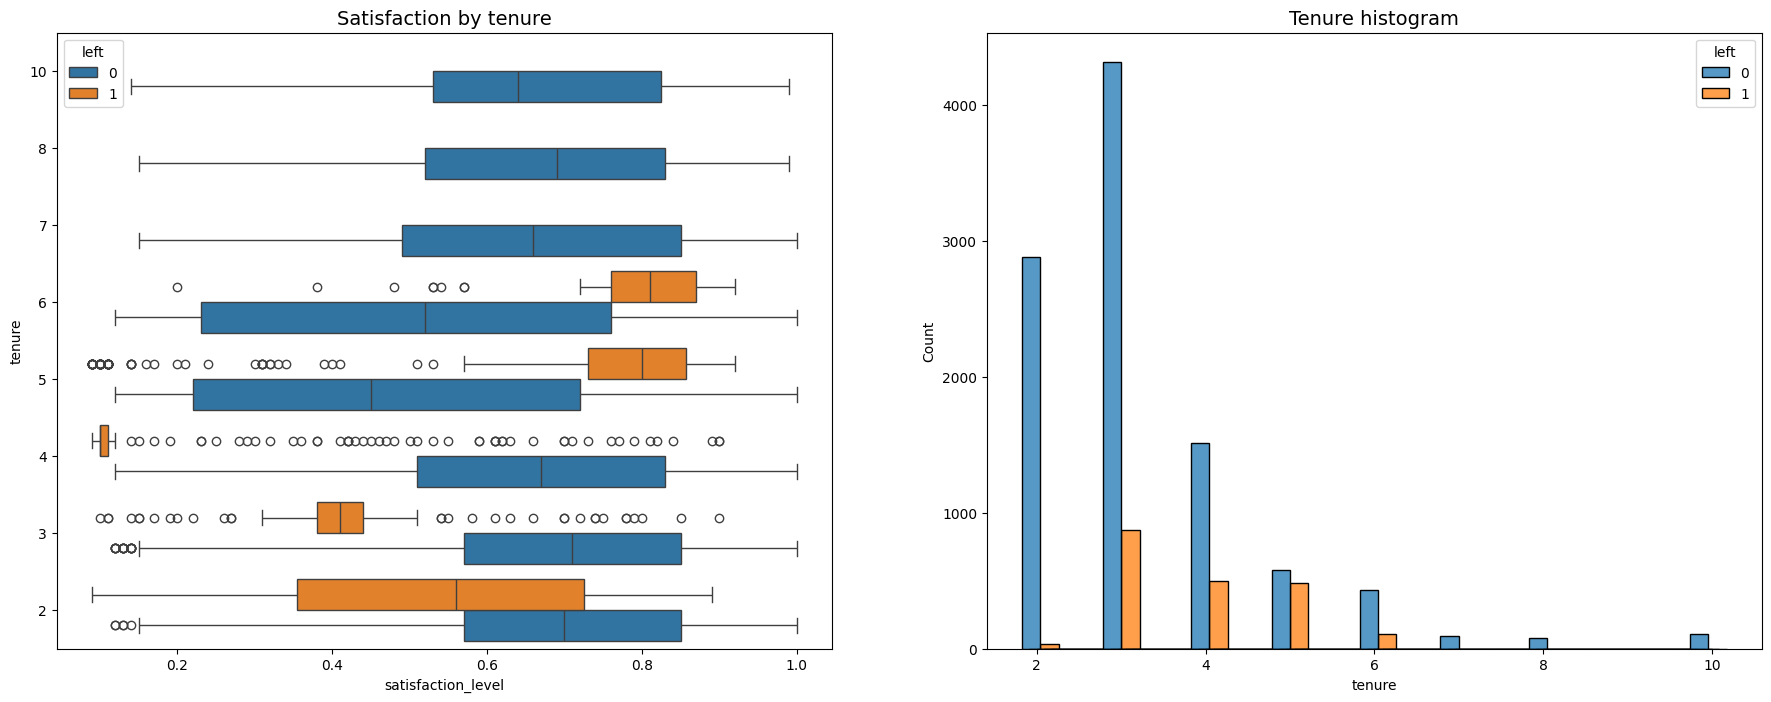

In [37]:
#Plot relationship between tenure vs satisfaction levels

#set figures and axes
fig, ax = plt.subplots(1,2, figsize= (22,8))

#Boxplot showing distributions of 'satisfaction_level' by 'tenure' comparing employees who left vs stayed
sns.boxplot(data=df1, x = 'satisfaction_level', y ='tenure', hue='left', orient= "h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize= '14')

#Histogram showing distribution of 'tenure', omparing employees who left vs stayed
tenure_stay= df1[df1['left']==0]['tenure']
tenure_left= df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x ='tenure', hue='left', multiple= 'dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram',fontsize= '14')

plt.show();

Observations from this plots above:
1. Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures. <br>
2. Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.<br>
3. The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.<br>
4. The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.<br>


Another EDA can be calculating the mean and median satisfaction scores of employees from those who left vs those who stayed.

In [24]:
#Calculation of mean and median values for 'satisfaction_level'
df1.groupby(['left'])['satisfaction_level'].agg(['mean', 'median'])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected the satisfaction level mean and median for those employees that left are lower than those who stayed.

Evaluation of salary levels for different tenures:

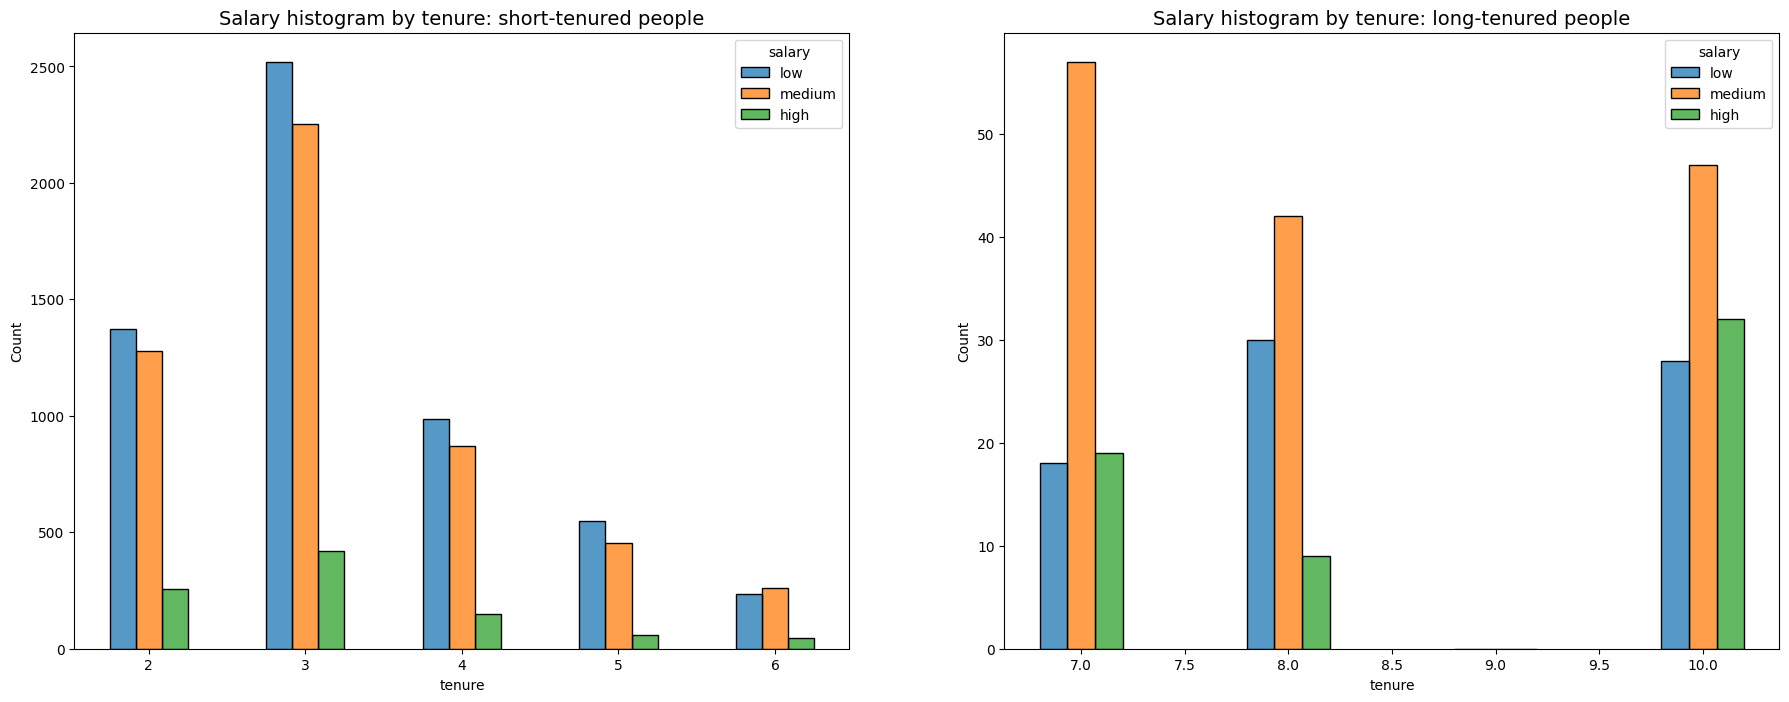

In [27]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

It is shown above that long-tenured employees are not disproportionally for higher salary employees.


Additional plots can be examined between other variables: 
1. Comparing average_monthly_hours and last_evaluation. 
2. Examine if employees that worked very long hours have been promoted in the last 5 years.

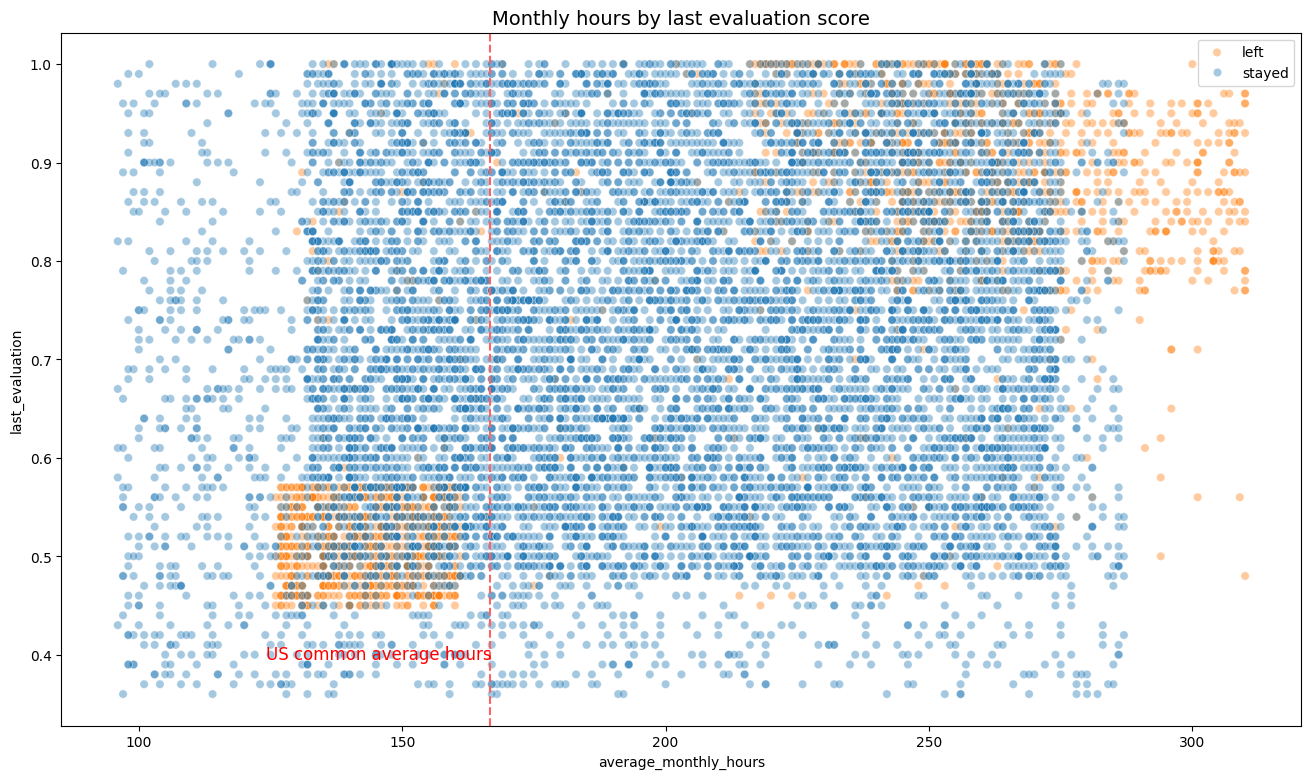

In [31]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')

#Add text labels
plt.text(167,0.4, 'US common average hours', color='red', fontsize= 12, va='center', ha='right')

plt.legend(labels=['left','stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

It is observed that two group of employees left the company: 
- those who overworked but had good performance reviews 
- those who worked under the monthly average but had lower evaluation score. 

It can be seen a correlation between hours worked and evaluation score.
Most employees worked well over 167 hours per month.


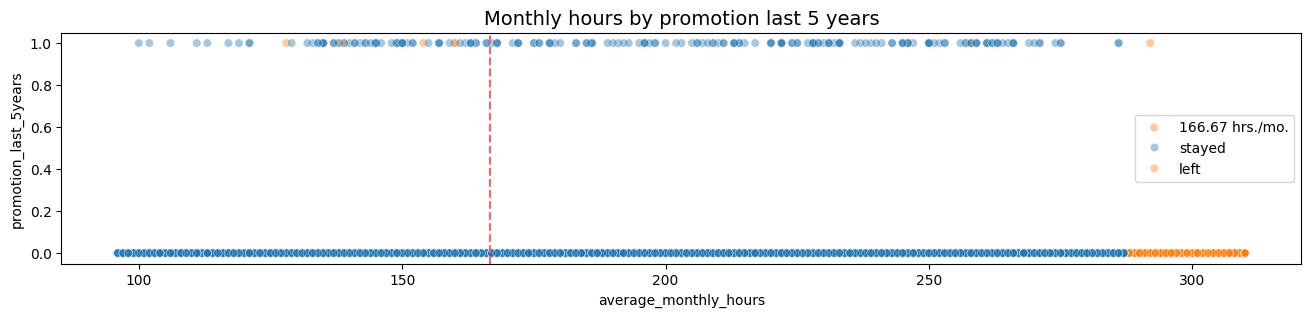

In [41]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed','left'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The scatterplot above indicates employees who left:
- a small group where promoted in the last 5 years.
- the majority where overworked with no promotion in the last 5 years.

Text(0.5, 1.0, 'Correlation Heatmap')

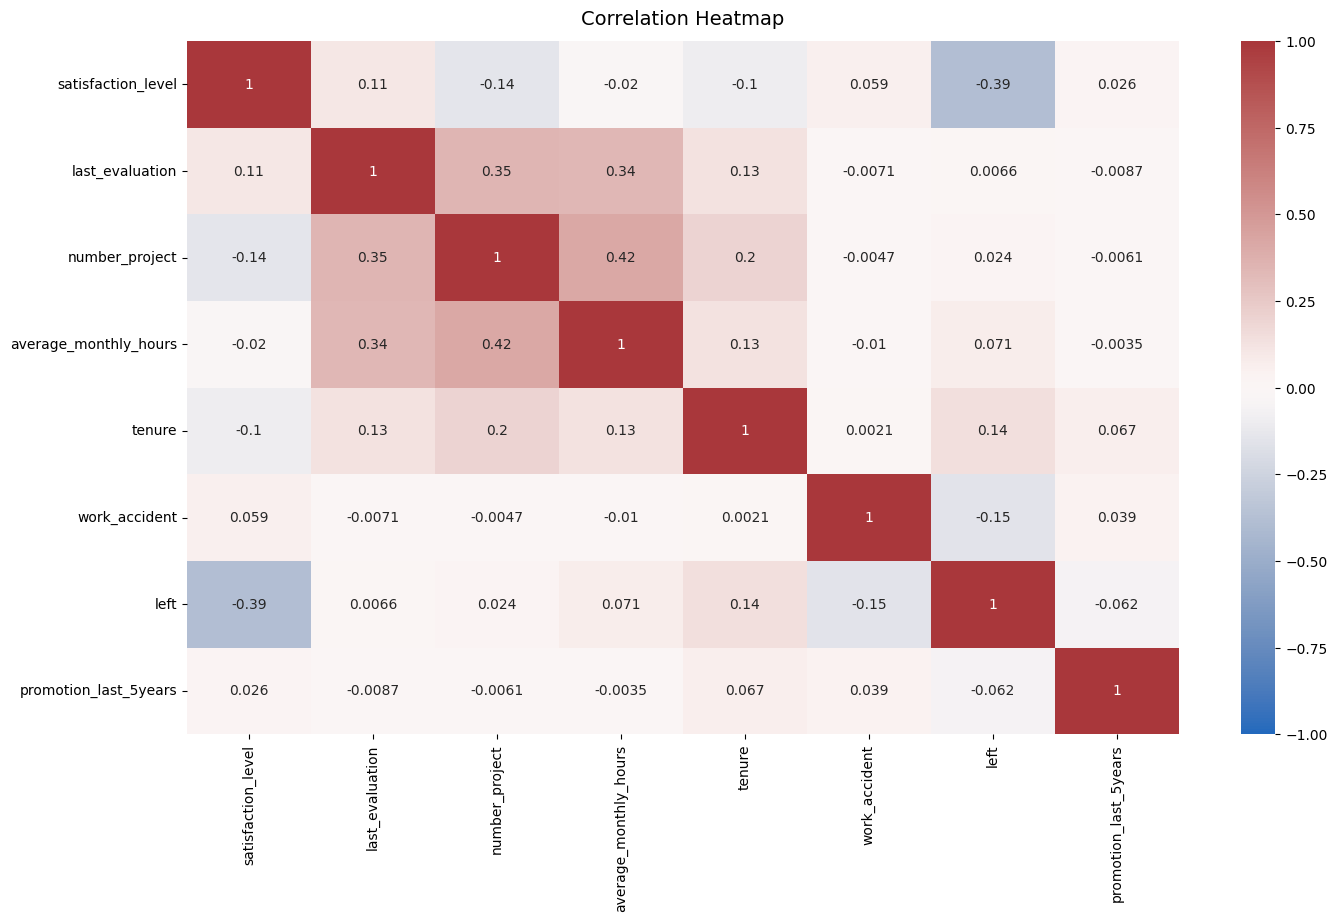

In [33]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
numeric_df = df0.select_dtypes(include=['number'])  # filter numeric columns
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)



The heatmap above shows that the employees that left the company correlated negatively with satisfaction_level. Meanwhile, the number of projects, average monthly hours and  evaluation scores had a positive correlation with each other. 

### Insights

From all the EDA process, the visualizations indicate that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

In [42]:
#Save df1 dataframe (without tenure outliers) for modeling. 
df1.to_csv("C:/Users/mvvb8/Documents/Coursera/Advancedanalytics/Capstone/Sailfort motors activity_filled/home/jovyan/work/HR_capstone_modeling.csv", index=False)